https://brightwon.tistory.com/11
MFCC란?
MFCC는 오디오 신호에서 추출할 수 있는 feature로, 소리의 고유한 특징을 나타내는 수치입니다.

MFCC의 기술적인 이해
기술적으로 말하면, MFCC(Mel-Frequency Cepstral Coefficient)는 Mel Spectrum(멜 스펙트럼)에서 Cepstral(켑스트럴) 분석을 통해 추출된 값입니다.

따라서, MFCC를 기술적으로 이해하려면 선행으로 다음 개념들을 알아야 합니다.

-  Spectrum(스펙트럼)

-  Cepstrum(켑스트럼)

-  Mel Spectrum(멜 스펙트럼)

In [2]:
# pip install librosa

In [3]:
# pip install tensorflow

In [4]:
# pip install resampy

In [5]:
import os
import librosa
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2023-11-24 18:48:43.143812: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 18:48:43.235139: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-24 18:48:43.637166: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 18:48:43.637219: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 18:48:43.639337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [6]:
# MFCC를 추출하기 위해서는

# 스펙트로그램 생성
# 멜 스케일 적용, 멜 스펙트로그램 생성
# 캡스트럴 분석을 통해 MFCC 특성을 추출
    # 캡스트럴 분석은 스펙트럼에서 배움 구조를 유추할 수 있도록 도와줌
        # 배움 구조란 음향의 음색? 정도로 생각하면 된다.
    # 멜 스텍트로그램에 절댓값과 로그를 취한 뒤 역 푸리에 변환을 수행하면 완료!

root = "../data/wavs/test/"
test = root + "Overhead Sample 30.wav"

max_pad_len = 174

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        # res_type='kaiser_fast' : resampy 더 빠른 방법
        # 여부에 따라 값이 다르게 나오긴 함
        # resampy
        # 다차원 리샘플링을 지원하며 오디오 애플리케이션에 매우 적합합니다.
        # 장기간 신호(예: 고품질 샘플링 속도에서 몇 분)의 경우 resampy는 scipy.signal.resample 보다
        # 상당히 빠르며 오디오 품질에서는 인지할 수 있는 차이가 거의 없습니다.
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        # audio, sample_rate = librosa.load(file_name)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        return None
    
#     return padded_mfccs
    return mfccs

extract_feature(test)

file name : ../data/wavs/test/Overhead Sample 30.wav
(40, 174)


array([[-71.170845  , -33.86195   , -32.417633  , ...,   0.        ,
          0.        ,   0.        ],
       [ 45.89365   ,  40.971138  ,  21.852135  , ...,   0.        ,
          0.        ,   0.        ],
       [-21.124023  , -29.353714  , -34.730606  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  1.486055  ,  -0.6735269 ,   0.29030752, ...,   0.        ,
          0.        ,   0.        ],
       [ -4.558303  ,  -5.945115  ,  -3.4609108 , ...,   0.        ,
          0.        ,   0.        ],
       [  5.622891  ,   5.185076  ,   9.278199  , ...,   0.        ,
          0.        ,   0.        ]], dtype=float32)

In [7]:
root_path = "../data/wavs/train/"
wav_list = os.listdir(root_path)
wav_files = [os.path.join(root_path, file) for file in wav_list if file.endswith('.wav')]
print(len(wav_files))

# data는 우리가 리브로사로 추출한 mfccs라는 특성이고
# class_label은 그 음향의 종류를 나타낸다.

features = []
for wav_file in wav_files:
    data = extract_feature(wav_file)
    class_label = 0
    if 'Overhead' in wav_file:
        class_label = 1
    elif 'Snare' in wav_file:
        class_label = 2
    elif 'Tom' in wav_file:
        class_label = 3
    elif 'Bass' in wav_file:
        class_label = 4
    else:
        class_label = 0
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

160
file name : ../data/wavs/train/Bass Sample 1.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 10.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 11.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 12.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 13.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 14.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 15.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 16.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 17.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 18.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 19.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 2.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 20.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 21.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 22.wav
(40, 174)
file name : ../data/wavs/train/Bass Sample 23.wav
(40, 174)
file name : ../data/wavs/train/Bass Sa

In [8]:
from keras.utils import to_categorical

# 불러온 featuresdf에서 feature는 X에 저장하였고 class_label은 y로 저장하였다.
# 헌데 y는 yy로 변환과정을 거쳐서 다시 저장되었다.
# 둘의 차이는 원-핫-인코딩의 여부이다.
# 원-핫-인코딩은 1,2,3 있을 때 1: [1.0.0] / 2:[0.1.0] / 3:[0.0.1] 로 변환해주는 거임.
# 이렇게 변환해서 사용하는 이유는 우리가 작성할 딥러닝 모델이 멀티 클래스(3~ 가지) 분류를 하기 때문이다.

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y[:10])
print(yy[:10])
print(y_test[:10])

(128, 40, 174)
(32, 40, 174)
[4 4 4 4 4 4 4 4 4 4]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [10]:
n_columns = 174    
n_row = 40       
n_channels = 1
n_classes = 4

# input shape 조정
# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

In [11]:
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model

model = keras.Sequential()

model.add(layers.Conv2D(input_shape=(n_row, n_columns, n_channels), filters=16, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 86, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 86, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 42, 32)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)         0

In [12]:
training_epochs = 72
num_batch_size = 128

learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=training_epochs)

Epoch 1/72
1/1 [==============================] - 2s 2s/step - loss: 8.1402 - accuracy: 0.2578
Epoch 2/72
1/1 [==============================] - 0s 94ms/step - loss: 5.7200 - accuracy: 0.2188
Epoch 3/72
1/1 [==============================] - 0s 97ms/step - loss: 4.6948 - accuracy: 0.2656
Epoch 4/72
1/1 [==============================] - 0s 93ms/step - loss: 4.0711 - accuracy: 0.2188
Epoch 5/72
1/1 [==============================] - 0s 108ms/step - loss: 3.8538 - accuracy: 0.2734
Epoch 6/72
1/1 [==============================] - 0s 213ms/step - loss: 2.7643 - accuracy: 0.3594
Epoch 7/72
1/1 [==============================] - 0s 300ms/step - loss: 1.6074 - accuracy: 0.4609
Epoch 8/72
1/1 [==============================] - 0s 340ms/step - loss: 1.7096 - accuracy: 0.5391
Epoch 9/72
1/1 [==============================] - 0s 254ms/step - loss: 1.9688 - accuracy: 0.5391
Epoch 10/72
1/1 [==============================] - 0s 255ms/step - loss: 2.1444 - accuracy: 0.4844
Epoch 11/72
1/1 [========

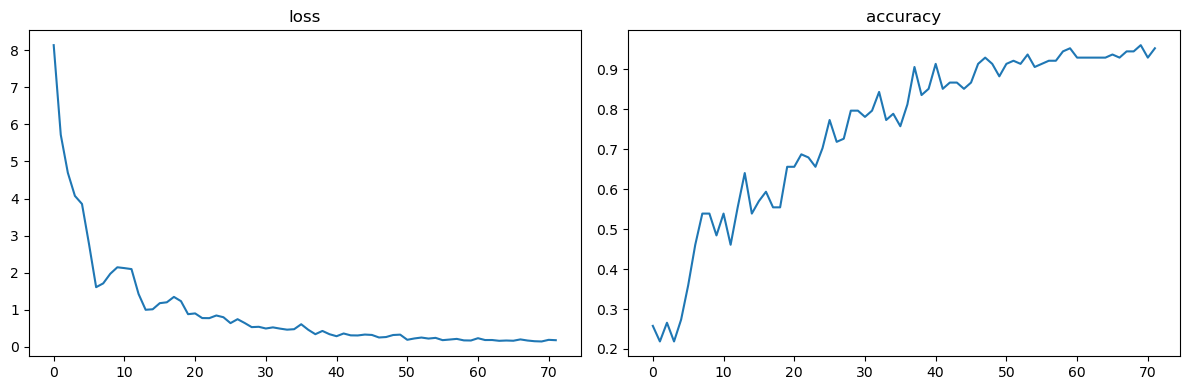

In [13]:
import matplotlib.pyplot as plt

def vis(history, key):
    x = np.arange(0, training_epochs)
    y = list(history.history[key])
    plt.plot(x, y)
    plt.title(key)
    
def plot_history(history) :
    # 0 accuracy, 1 loss
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()
    
plot_history(history)

In [14]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

model.save("drum_classifier_model")


# Evaluate on test data
1/1 [==============================] - 0s 315ms/step - loss: 0.5078 - accuracy: 0.7188
test loss, test acc: [0.5077832937240601, 0.71875]
INFO:tensorflow:Assets written to: drum_classifier_model/assets


INFO:tensorflow:Assets written to: drum_classifier_model/assets


In [15]:
root = "../data/wavs/test/"
# test = root + "WaveDrum02_60#MIX_mp3cut.wav"
test = root + "Overhead Sample 30.wav"
# test = root + "Snare Sample 30.wav"
# test = root + "Tom Sample 30.wav"

n_columns = 174    
n_row = 40       
n_channels = 1

# input shape 조정
# cpu를 사용해서 수행한다
test = np.array(extract_feature(test))
with tf.device('/cpu:0'):
    test = tf.reshape(test, [-1, n_row, n_columns, n_channels])

# [Overhead, Snare, Tom, Bass]
model.predict(test, batch_size=128)

file name : ../data/wavs/test/Overhead Sample 30.wav
(40, 174)
1/1 [==============================] - 0s 158ms/step


array([[9.9901140e-01, 9.8861952e-04, 2.7275007e-09, 1.6283542e-09]],
      dtype=float32)